## アノテーションのクラスの分類に関する分析

アノテーションのクラスが固有表現単位だけでなく，文に対して振られることもある

そのため，どのクラスが文に対して振られている（振られやすい）のか，固有表現に振られるのかを各データセットごとに分析する

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import re

In [2]:
plt.rcParams['font.family'] = 'IPAGothic'

In [3]:
def json_load(json_dir, json_class):
    json_file = '{}{}_dist.json'.format(json_dir, json_class)
    content = '['
    with open(json_file, 'r') as f:
        content += ''.join(
            [re.sub(r'}\n', '},\n', line)
                for line in f.readlines()]
        )[:-2] + ']'
    json_contents = json.loads(content)
    return json_contents

In [4]:
def mean_string_length_per_class(json_contents):
    length_per_class_base = {'sum_length':0, 'sum_count': 0}
    sum_length_per_class = {}
    for content in json_contents:
        class_ = content['attribute']
        if class_ not in sum_length_per_class.keys():
            sum_length_per_class[class_] = deepcopy(length_per_class_base)
        sum_length_per_class[class_]['sum_length'] += len(content['text_offset']['text'])
        sum_length_per_class[class_]['sum_count'] += 1
    return {
        k: v['sum_length'] / v['sum_count']
        for k, v in sum_length_per_class.items()
    }

In [5]:
json_dir =  '/Users/rikeda/Desktop/Sinra/JP-5 2/annotation/'
classes = ['Airport', 'City', 'Company', 'Compound', 'Person']
dfs = []
for c in classes:
    mean_length_dict = mean_string_length_per_class(json_load(json_dir, c))
    kv = {
        'values': list(mean_length_dict.values())
    }
    df = pd.DataFrame(kv, index=list(mean_length_dict.keys()))
    df = df.sort_values('values')
    dfs.append((c, df))

Airport


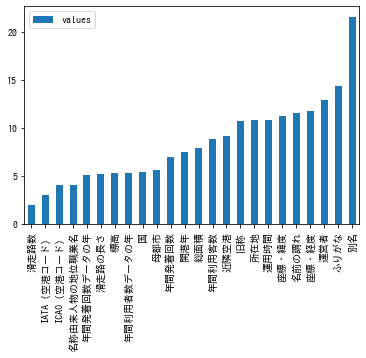

In [6]:
print(dfs[0][0])
dfs[0][1].plot(kind='bar')

City


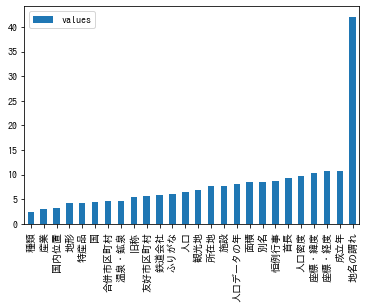

In [7]:
print(dfs[1][0])
dfs[1][1].plot(kind='bar')

Company


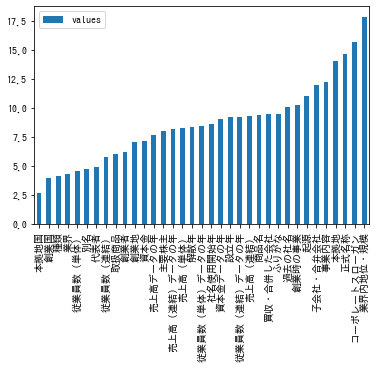

In [8]:
print(dfs[2][0])
dfs[2][1].plot(kind='bar')

- 業界内地位はかなり固有表現長が長いので他の固有表現を包含しそう
- コーポレートスローガンはキャッチコピー取得とかにも使えそう

Compound


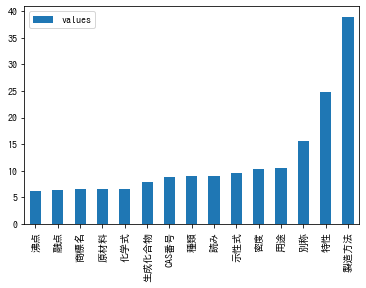

In [9]:
print(dfs[3][0])
dfs[3][1].plot(kind='bar')

- 製造方法，用途，特性は固有表現を包含している

Person


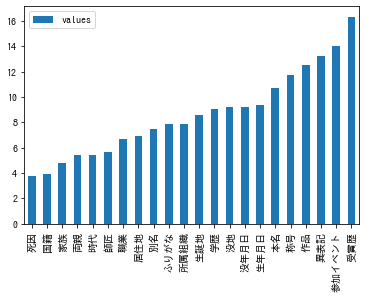

In [10]:
print(dfs[4][0])
dfs[4][1].plot(kind='bar')

まとめると，以下の文書とカテゴリの組み合わせは，一旦NERの対象からは弾いた方が良さそう
- Company: 業界内地位（要検証）
- Compound: 製造方法
- Compound: 用途
- Compound: 特性